In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
mpl.rc("font", size=15)

In [4]:
import DA

In [5]:
N = 40
T = 0.05  # 6h = 1/4 day = 0.2 / 4
U = DA.Lorenz96.teo(8, T, 5)

In [6]:
p = 40
K = 8
H = DA.observation.trivial(N)
R = np.identity(p)
A = DA.LETKF.analysis(H, R, 8, rho=1.1)
F = DA.ETKF.forcast(U)

In [7]:
x = np.sin(np.arange(0, np.pi, np.pi/N))
tl = []
for t in range(500):
    x = U(x)
    tl.append(x.copy())
tl = np.array(tl)

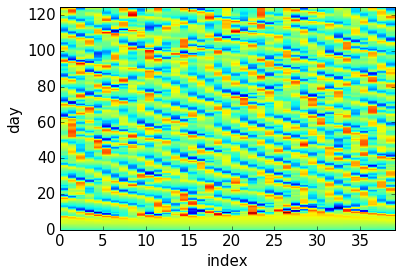

In [8]:
index = range(N)
day = 0.25*np.arange(len(tl))
X, Y = np.meshgrid(index, day)
plt.pcolormesh(X, Y, tl)
plt.axis("tight")
plt.xlabel("index")
plt.ylabel("day")

In [9]:
xa = x.copy()
Xa = DA.ETKF.make_ensemble(N, K, 1)

In [10]:
tl = []
for t in range(1000):
    x = U(x)
    xb, Xb = F(xa, Xa)
    xa, Xa = A(xb, Xb, H(x)+np.random.normal(size=N))
    tl.append((np.linalg.norm(x-xa) / np.sqrt(N), np.average(np.std(Xa, axis=1)), x[0], xa[0]))
df = pd.DataFrame(tl, index=0.25*np.arange(len(tl)), columns=["RMS", "std", "truth", "estimate"])
df.index.name = "day"

0.303877276503


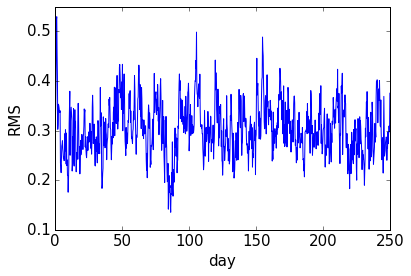

In [11]:
df["RMS"].plot()
plt.ylabel("RMS")
print(df["RMS"].mean())
plt.savefig("LETKF_RMS.png", bbox_inches="tight")

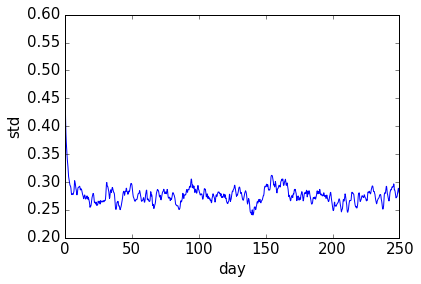

In [12]:
df["std"].plot()
plt.ylabel("std")

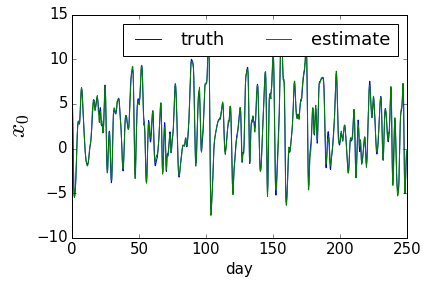

In [13]:
df[["truth", "estimate"]].plot()
plt.ylabel(r"$x_0$", fontsize=25)
plt.legend(ncol=2)
plt.savefig("LETKF_x0.png", bbox_inches="tight")

In [14]:
rms = {
    4: 0.28013962497819839,
    5: 0.29151225048553342,
    8: 0.30459657996936629,
    10: 0.31915185616760894,
    20: 0.35730631748373831,
    40: 0.40842469957076899
}
rms_df = pd.DataFrame(list(rms.items()), columns=["P", "RMS"]).set_index("P")

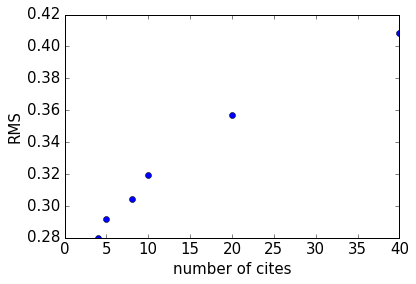

In [15]:
plt.plot(rms_df.index, rms_df, "o", label="K=8")
plt.xlabel("number of cites")
plt.ylabel("RMS")
plt.savefig("LETKF_P_RMS.png", bbox_inches="tight")